# Bike Rental Analysis


Here, I am going to investigate the effect of weather on bike rentals. The original dataset can be found [here](http://archive.ics.uci.edu/dataset/275/bike+sharing+dataset). 
I am going to create a simple linear regression model with temperature, humidity and windspeed as the variables to define the weather. 

## Overview of dataset

### References


Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto<\br >
INESC Porto, Campus da FEUP<\br >
Rua Dr. Roberto Frias, 378<\br >
4200 - 465 Porto, Portugal<\br >
<\br ><\br >

## Background 
<\br >

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. <\br ><\br>

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.<\br ><\br >


## Data Set
<\br ><\br >
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered  

Click [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) for more information.

## Overview of Data

In [242]:
#Import packages required

import pandas as pd
import numpy as np
import sklearn.linear_model 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Reading in the Dataset. Decided to only analyse the daily data.
day_data = pd.read_csv("day.csv")

In [15]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [20]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [189]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<Axes: xlabel='temp', ylabel='cnt'>

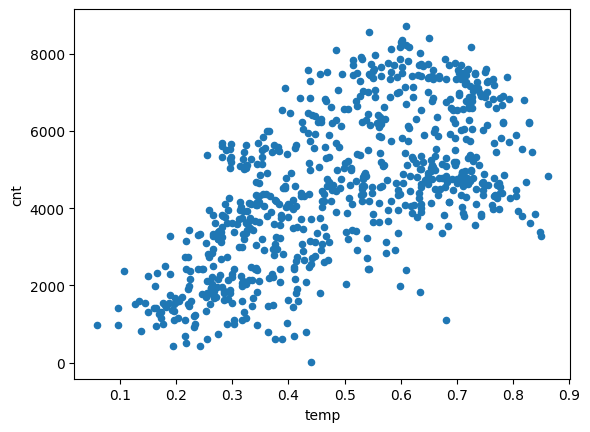

In [76]:
%matplotlib inline
df = day_data[['temp','hum','windspeed','cnt']]
df.plot(kind= 'scatter', x = 'temp', y = 'cnt')

There looks to be a reasonable correlation between temperature and rentals

<Axes: xlabel='hum', ylabel='cnt'>

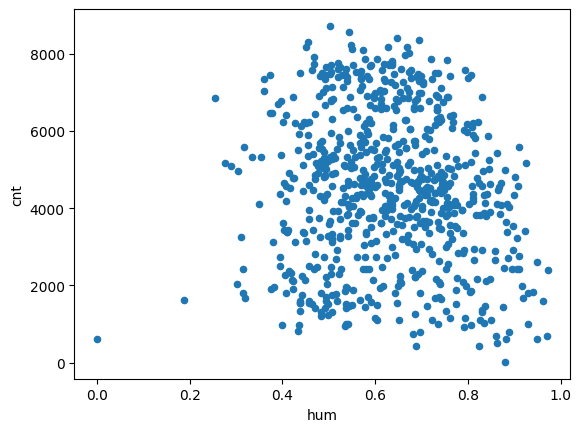

In [77]:
df.plot(kind = 'scatter', x = 'hum', y = 'cnt')

<Axes: xlabel='windspeed', ylabel='cnt'>

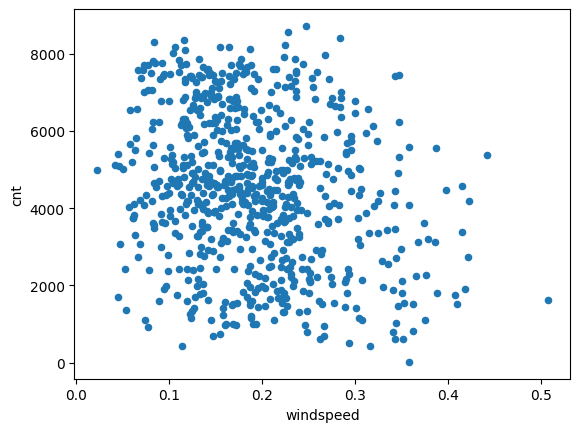

In [78]:
df.plot(kind = 'scatter', x = 'windspeed', y = 'cnt')

Definitly less corrolation between the other 2 factors and rentals

## Training model

In [216]:
predictors = list(df.columns)
predictors.remove('cnt')
x = df[predictors]

In [217]:
y = df[['cnt']]

In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 50)

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [221]:
model = LinearRegression().fit(x_train, y_train)


## Evaluate the model

In [222]:
model.intercept_

array([4056.32817419])

In [223]:
coefficients =list(model.coef_.flatten())
for i in range(len(predictors)):
    print(f'The coefficient for {predictors[i]} is {coefficients[i]}')

The coefficient for temp is 6958.947046256441
The coefficient for hum is -3235.8399097412475
The coefficient for windspeed is -5132.806645590976


In [226]:
model.score(x_test, y_test)

0.3864290113543256

Here, there is only a corrolation of <0.4 indicating a weak model. 
Next, I will analyse if there are any other factors which could be added to strenghten the predictive power

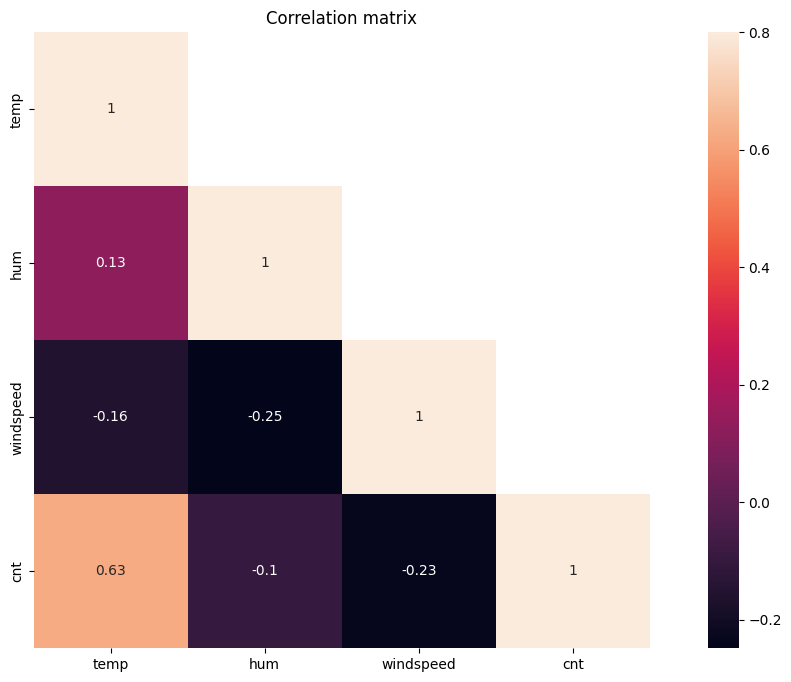

In [233]:
#Create the correlation matrix and plot in heatmap
correMtr=day_data[["temp","hum","windspeed","cnt"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix')
plt.show()

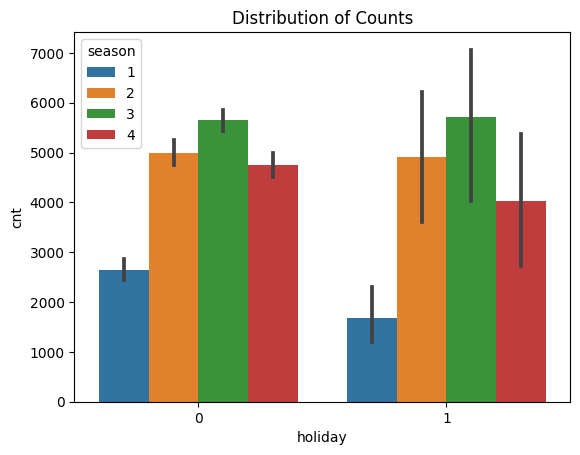

In [241]:
fig,ax=plt.subplots()
#Barplot for Holiday distribution of counts
sns.barplot(data=day_data,x='holiday',y='cnt', hue = 'season')
ax.set_title('Distribution of Counts')
plt.show()

Here we can see that season and holidays both have an effect. So should be added to the model.